   # **SMS SPAM TESPƒ∞Tƒ∞**

Metin verisi i≈üleme, makine √∂ƒürenmesi modeli olu≈üturma ve deƒüerlendirme i√ßin kapsamlƒ± bir k√ºt√ºphane seti i√ße aktarƒ±lmƒ±≈ütƒ±r. pandas veri y√∂netimi i√ßin, re ve string metin temizliƒüi ve d√ºzenlemesi i√ßin kullanƒ±lƒ±r. Veri setini eƒüitim ve test olarak b√∂lmek i√ßin train_test_split, metinleri sayƒ±sal vekt√∂rlere d√∂n√º≈üt√ºrmek i√ßin TfidfVectorizer tercih edilmi≈ütir. Model olu≈üturma ve optimizasyon a≈üamalarƒ±nda Naive Bayes, Lojistik Regresyon, Random Forest, SVM gibi √ße≈üitli sƒ±nƒ±flandƒ±rƒ±cƒ±lar ile birlikte GridSearchCV ve StratifiedKFold gibi √ßapraz doƒürulama ve hiperparametre ayarlama ara√ßlarƒ± kullanƒ±lmƒ±≈ütƒ±r. Pipeline yapƒ±sƒ±, veri d√∂n√º≈ü√ºm√º ve model a≈üamalarƒ±nƒ± entegre ederek i≈ü akƒ±≈üƒ±nƒ± kolayla≈ütƒ±rƒ±r. Performans √∂l√ß√ºmleri i√ßin doƒüruluk, sƒ±nƒ±flandƒ±rma raporu, karƒ±≈üƒ±klƒ±k matrisi ve g√∂rselle≈ütirme ara√ßlarƒ± (matplotlib, seaborn) yer almakta, ayrƒ±ca nltk ve collections.Counter metin analizlerinde destek saƒülar. Bu hazƒ±rlƒ±k, kapsamlƒ± ve esnek bir metin sƒ±nƒ±flandƒ±rma projesi i√ßin gerekli t√ºm ara√ßlarƒ± i√ßermektedir.

In [1]:
import pandas as pd
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import json
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import random, numpy as np, os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import LinearSVC
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import nltk
from collections import Counter
from sklearn.preprocessing import LabelEncoder



Bu komutlar, Python ortamƒ±na trnlp ve nltk k√ºt√ºphanelerini y√ºklemek i√ßin kullanƒ±lƒ±r. trnlp, √∂zellikle T√ºrk√ße doƒüal dil i≈üleme g√∂revlerinde yardƒ±mcƒ± olan bir k√ºt√ºphane iken, nltk (Natural Language Toolkit) doƒüal dil i≈üleme alanƒ±nda geni≈ü kapsamlƒ± ara√ßlar ve veri setleri sunar. Bu k√ºt√ºphaneler, metinlerin analiz edilmesi, √∂n i≈ülenmesi ve doƒüal dil i≈üleme uygulamalarƒ±nƒ±n geli≈ütirilmesi i√ßin temel altyapƒ±yƒ± saƒülar.

In [2]:
!pip install trnlp
!pip install nltk

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10.1/10.1 MB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for trnlp: filename=trnlp-0.2.3a0-py3-none-any.whl size=10168260 sha256=1c030e8e6706df45f706d25a23bb0d77298593c7b19408e4776d41bed8586935
  Stored in directory: /root/.cache/pip/wheels/f5/75/d1/fb5c7ad584aafd96ae8d425dcdb7e64296f729fcb2eeccf26b
Successfully built trnlp


Bu kod satƒ±rƒ±nda, pandas k√ºt√ºphanesi kullanƒ±larak belirtilen Excel dosyasƒ±ndan bir veri seti (karistirilmis_sms_dataset.xlsx) y√ºklenmektedir. df deƒüi≈ükeni, veri setini bir DataFrame olarak saklar ve df.head() fonksiyonu veri setinin ilk 5 satƒ±rƒ±nƒ± g√∂r√ºnt√ºleyerek veri yapƒ±sƒ±nƒ±n genel yapƒ±sƒ±nƒ± ve i√ßeriƒüini hƒ±zlƒ±ca incelemeyi saƒülar. df.info() ifadesi, Pandas DataFrame'in yapƒ±sƒ± hakkƒ±nda √∂zet bilgi verir.Bu adƒ±m, veri analizine ba≈ülamadan √∂nce veri setinin temel √∂zelliklerini anlamak i√ßin standart bir uygulamadƒ±r.

In [3]:
df = pd.read_excel("/kaggle/input/sonveriseti/guncellenmis_sms_dataset.xlsx")  # √∂rnek
df.head()


label                                            message
0  spam  KAYIT VE INDIRME LINKLERI AKTIF!Turkiyenin rek...
1   ham  Hattiniz kapaliyken sizi arayan +905300515079 ...
2   ham                                     k√ºt√ºphanedeyim
3  spam  Ramazana √ñzel Yeni Kayƒ±tlara 12.500 EM + 5000 ...
4   ham  Starbucks Turkiye hesabinizin parolasini yenil...

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2060 entries, 0 to 2059
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    2060 non-null   object
 1   message  2060 non-null   object
dtypes: object(2)
memory usage: 32.3+ KB


Veri setindeki sƒ±nƒ±f daƒüƒ±lƒ±mƒ±nƒ± iki farklƒ± g√∂rselle birlikte sunar. ƒ∞lk olarak, seaborn k√ºt√ºphanesi ile √ßubuk grafik (countplot) √ßizilerek her sƒ±nƒ±fa ait √∂rnek sayƒ±sƒ± g√∂sterilir. Yanƒ±nda ise matplotlib kullanƒ±larak pasta grafiƒüi √ßizilir ve sƒ±nƒ±flarƒ±n toplam veri i√ßerisindeki y√ºzdesel oranlarƒ± g√∂rsel olarak ifade edilir. Bu √ßift grafik, hem sƒ±nƒ±f adetlerini hem de oranlarƒ±nƒ± aynƒ± anda inceleyerek veri dengesizliƒüi ve daƒüƒ±lƒ±mƒ± hakkƒ±nda daha kapsamlƒ± bilgi edinmeyi saƒülar.

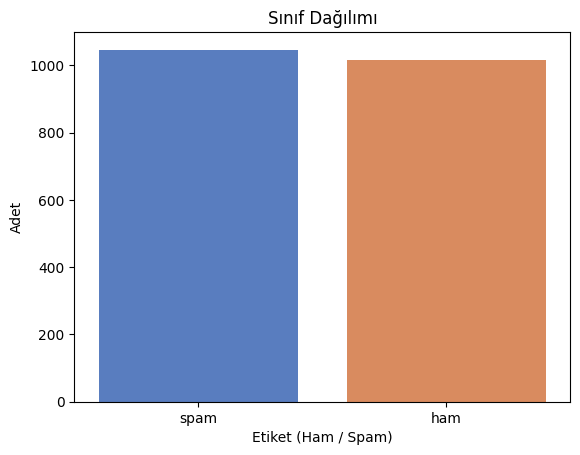

In [5]:
sns.countplot(data=df, x='label', palette='muted')
plt.title("Sƒ±nƒ±f Daƒüƒ±lƒ±mƒ±")
plt.xlabel("Etiket (Ham / Spam)")
plt.ylabel("Adet")
plt.show()


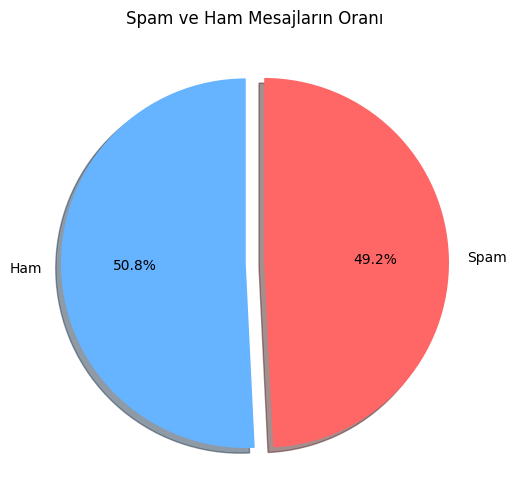

In [6]:

# Sƒ±nƒ±f daƒüƒ±lƒ±mƒ±nƒ± say
counts = df['label'].value_counts()
labels = ['Ham', 'Spam']

# Pasta grafiƒüi √ßiz
plt.figure(figsize=(6,6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=['#66b3ff','#ff6666'], startangle=90, explode=(0.05, 0.05), shadow=True)
plt.title('Spam ve Ham Mesajlarƒ±n Oranƒ±')
plt.show()


Bu kod satƒ±rƒ±nda, veri setindeki label s√ºtunundaki kategorik metin deƒüerleri sayƒ±sal deƒüerlere d√∂n√º≈üt√ºr√ºlmektedir. 'ham' etiketi 0, 'spam' etiketi ise 1 olarak e≈ülenerek, sƒ±nƒ±flar ikili (binary) formata getirilir. Bu d√∂n√º≈ü√ºm, makine √∂ƒürenmesi modellerinin √ßalƒ±≈üabilmesi i√ßin gereklidir √ß√ºnk√º √ßoƒüu algoritma sayƒ±sal veri ile i≈ülem yapar.

In [7]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df

label                                            message
0         1  KAYIT VE INDIRME LINKLERI AKTIF!Turkiyenin rek...
1         0  Hattiniz kapaliyken sizi arayan +905300515079 ...
2         0                                     k√ºt√ºphanedeyim
3         1  Ramazana √ñzel Yeni Kayƒ±tlara 12.500 EM + 5000 ...
4         0  Starbucks Turkiye hesabinizin parolasini yenil...
...     ...                                                ...
2055      1  ≈ûOK Market: 500‚Ç∫ alƒ±≈üveri≈ü √ßeki kazandƒ±nƒ±z. Ku...
2056      1  Microsoft: Hesabƒ±nƒ±za ≈ü√ºpheli bir yazƒ±lƒ±m bula...
2057      1  Kargo Takip: Yurt dƒ±≈üƒ± paketiniz g√ºmr√ºkte bekl...
2058      1  √ñSYM: Sƒ±nav ba≈üvurunuz ge√ßersiz sayƒ±lmƒ±≈ütƒ±r. T...
2059      1  LinkedIn: Profiliniz rapor edildi. G√∂zden ge√ßi...

[2060 rows x 2 columns]

# **VERƒ∞ √ñN ƒ∞≈ûLEME**

Bu kod bloƒüu, T√ºrk√ße metinleri temizlemek ve √∂n i≈üleme tabi tutmak i√ßin kapsamlƒ± bir fonksiyon tanƒ±mlar. √ñncelikle, bir JSON dosyasƒ±ndan T√ºrk√ße stop-word (√∂nemsiz kelimeler) listesi y√ºklenir ve arama hƒ±zƒ±nƒ± artƒ±rmak i√ßin set veri yapƒ±sƒ±na d√∂n√º≈üt√ºr√ºl√ºr. temizle_stopwords fonksiyonu, verilen metni √∂nce k√º√ß√ºk harfe √ßevirir, URL adreslerini ve ‚Äúb123‚Äù gibi operat√∂r etiketlerini d√ºzenli ifadelerle kaldƒ±rƒ±r, sayƒ±larƒ± ve noktalama i≈üaretlerini temizler. Ayrƒ±ca, metindeki fazla bo≈üluklarƒ± tek bo≈üluƒüa indirger. Son olarak, metni kelimelere ayƒ±rƒ±r ve stop-word listesinde bulunan ya da tek harfli kelimeleri √ßƒ±kararak temizlenmi≈ü ve gereksiz kelimelerden arƒ±ndƒ±rƒ±lmƒ±≈ü bir metin d√∂ner. Bu √∂n i≈üleme, doƒüal dil i≈üleme modellerinin doƒüruluƒüunu artƒ±rmak i√ßin √∂nemli bir adƒ±mdƒ±r.

In [8]:
import unicodedata

with open('/kaggle/input/turkce-stopwords/turkce_stopwords1.json', 'r', encoding='utf-8') as f:
    data = json.load(f)
    turkce_stopwords = set(data['stopwords'])  # Set olarak almak arama hƒ±zƒ±nƒ± artƒ±rƒ±r

def temizle_stopwords(text):
    # 2. K√º√ß√ºk harfe √ßevir
    text = text.lower()

    # 4. Telefon numarasƒ± gibi uzun rakam dizilerini maskele
    text = re.sub(r'\b\d{7,}\b', ' NUMARA ', text)

    # 7. Tek karakterli kelimeleri ve bo≈üluklarƒ± sadele≈ütir
    text = re.sub(r'\b\w\b', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    # Kelimeleri par√ßala ve stopword‚Äôleri √ßƒ±kar
    kelimeler = text.split()
    kelimeler = [k for k in kelimeler if k not in turkce_stopwords and len(k) > 1]

    return ' '.join(kelimeler)


In [9]:
def orta_duzey_on_isleme(text):
    temiz = temizle_stopwords(text)
    return temiz


In [10]:
df['message_cleaned'] = df['message'].apply(orta_duzey_on_isleme)


In [11]:
print(df[['message', 'message_cleaned']].sample(5))


                                                message  \
1030  Bug√ºn dƒ±≈üarƒ± √ßƒ±kacaksan ≈üemsiye al, yaƒümur bas...   
193   Size √∂zel bir video mesajƒ± var! ƒ∞zlemek i√ßin t...   
1921  Bankanƒ±z: XXXX nolu kartƒ±nƒ±zla yapƒ±lan 150.75 ...   
1165  Banka kartƒ±nƒ±z basƒ±lmƒ±≈ütƒ±r. 3 i≈ü g√ºn√º i√ßinde a...   
456   Evren2'de Kayƒ±tlar ve ƒ∞ndirmeler A√ßƒ±ldƒ±, √ñn Ka...   

                                        message_cleaned  
1030  bug√ºn dƒ±≈üarƒ± √ßƒ±kacaksan ≈üemsiye al, yaƒümur bas...  
193   size √∂zel video mesajƒ± var! Ãázlemek tƒ±klayƒ±n: ...  
1921  bankanƒ±z: xxxx nolu kartƒ±nƒ±zla 150.75 tl tutar...  
1165  banka kartƒ±nƒ±z basƒ±lmƒ±≈ütƒ±r. g√ºn√º i√ßinde adresi...  
456   evren2'de kayƒ±tlar Ãándirmeler a√ßƒ±ldƒ±, √∂n kayƒ±t...  


Metin verisi √ºzerinde temel istatistiksel √∂zellikler √ßƒ±kararak veri analizi i√ßin √∂nemli √∂znitelikler (feature‚Äôlar) olu≈üturur.

**No_of_Characters:** Her bir temizlenmi≈ü mesajdaki toplam karakter sayƒ±sƒ±nƒ± hesaplar.

**No_of_Words:** nltk k√ºt√ºphanesinin word_tokenize fonksiyonu kullanƒ±larak her mesajdaki kelime sayƒ±sƒ±nƒ± belirler.

**No_of_Sentences:** nltk'nin sent_tokenize fonksiyonu ile her mesajdaki c√ºmle sayƒ±sƒ± hesaplanƒ±r.

Son olarak, groupby('label') ile mesajlar "ham" veya "spam" olarak sƒ±nƒ±flandƒ±rƒ±lƒ±r ve bu sƒ±nƒ±flara g√∂re karakter, kelime ve c√ºmle sayƒ±larƒ±nƒ±n temel istatistikleri (ortalama, standart sapma vb.) √∂zetlenir. Bu t√ºr √∂znitelikler, mesajlarƒ±n yapƒ±sal farklƒ±lƒ±klarƒ±nƒ± analiz ederek model performansƒ±nƒ± artƒ±rmaya yardƒ±mcƒ± olabilir.

In [12]:
#nltk.download('punkt')  # Eƒüer nltk tokenizasyon paketleri indirilmediyse

# Karakter sayƒ±sƒ±
df['No_of_Characters'] = df['message_cleaned'].apply(len)

# Kelime sayƒ±sƒ±
df['No_of_Words'] = df['message_cleaned'].apply(lambda x: len(nltk.word_tokenize(x)))

# C√ºmle sayƒ±sƒ±
df['No_of_Sentences'] = df['message_cleaned'].apply(lambda x: len(nltk.sent_tokenize(x)))

# Sonu√ßlarƒ±n √∂zetine bakalƒ±m
df.groupby('label')[['No_of_Characters', 'No_of_Words', 'No_of_Sentences']].describe().T


label                             0            1
No_of_Characters count  1014.000000  1046.000000
                 mean    130.462525   136.994264
                 std     114.977967    41.474036
                 min       0.000000    49.000000
                 25%      49.000000   129.000000
                 50%      81.000000   137.000000
                 75%     177.750000   144.000000
                 max     810.000000   432.000000
No_of_Words      count  1014.000000  1046.000000
                 mean     18.519724    20.979924
                 std      14.912946     7.410879
                 min       0.000000     7.000000
                 25%       8.000000    18.000000
                 50%      12.000000    21.000000
                 75%      25.000000    23.000000
                 max     116.000000    66.000000
No_of_Sentences  count  1014.000000  1046.000000
                 mean      2.001972     2.153920
                 std       1.215236     1.171520
                 min       0.000000     1.000000
                 25%       1.000000     1.000000
                 50%       2.000000     2.000000
                 75%       3.000000     3.000000
                 max       8.000000     7.000000

Veri setindeki mesajlarƒ±n yapƒ±sal √∂zelliklerini farklƒ± grafiklerle analiz etmeye y√∂neliktir.

**Boxplot**:
No_of_Characters deƒüi≈ükeninin sƒ±nƒ±flara (Ham=0, Spam=1) g√∂re daƒüƒ±lƒ±mƒ±nƒ± kutu grafik (boxplot) ile g√∂sterir. Bu sayede karakter sayƒ±sƒ±ndaki medyan, √ßeyrekler ve u√ß deƒüerler spam ve ham mesajlar arasƒ±nda kar≈üƒ±la≈ütƒ±rƒ±lƒ±r.

**Scatterplot**:
Karakter sayƒ±sƒ± ile kelime sayƒ±sƒ± arasƒ±ndaki ili≈ükiyi g√∂sterir. Noktalar, mesajlarƒ±n sƒ±nƒ±fƒ±na g√∂re (ye≈üil: ham, kƒ±rmƒ±zƒ±: spam) renklendirilmi≈ütir. B√∂ylece iki √∂zellik arasƒ±ndaki korelasyon g√∂rsel olarak incelenir.

**Histogram (Mesaj Uzunluƒüu):**
Mesaj uzunluƒüunun (karakter sayƒ±sƒ± bazƒ±nda) spam ve ham mesajlar i√ßin daƒüƒ±lƒ±mƒ±nƒ± yoƒüunluk eƒürisi (KDE) ile birlikte sunar.

**Histogram (Kelime Sayƒ±sƒ±):**
Kelime sayƒ±sƒ±nƒ±n sƒ±nƒ±flara g√∂re daƒüƒ±lƒ±mƒ± g√∂sterilir; spam mesajlar kƒ±rmƒ±zƒ±, ham mesajlar ye≈üil renkte g√∂sterilmi≈ütir.

Bu g√∂rselle≈ütirmeler, spam ve ham mesajlarƒ±n yapƒ±sal √∂zelliklerinin farklƒ±lƒ±klarƒ±nƒ± ortaya koyar ve bu farklarƒ±n makine √∂ƒürenmesi modellerinde kullanƒ±lacak √∂zniteliklerin se√ßilmesinde rehberlik eder.

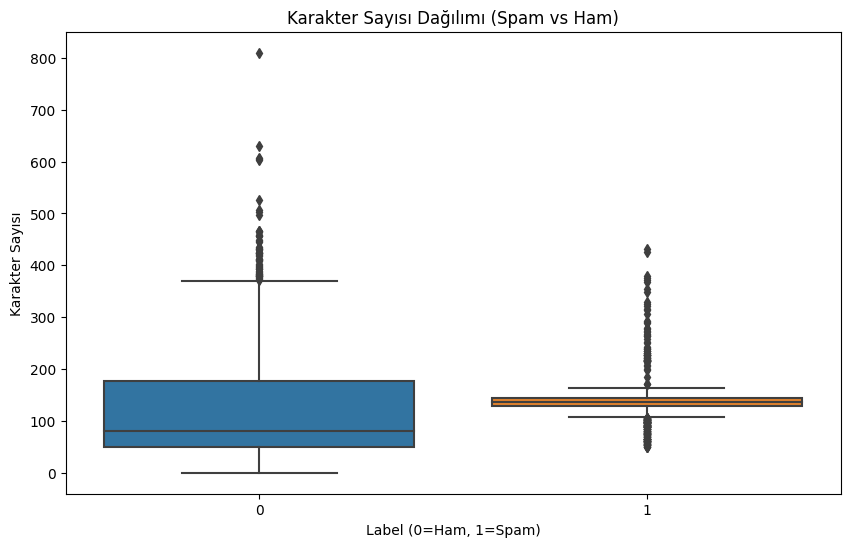

In [13]:

plt.figure(figsize=(10,6))
sns.boxplot(x='label', y='No_of_Characters', data=df)
plt.title('Karakter Sayƒ±sƒ± Daƒüƒ±lƒ±mƒ± (Spam vs Ham)')
plt.xlabel('Label (0=Ham, 1=Spam)')
plt.ylabel('Karakter Sayƒ±sƒ±')
plt.show()


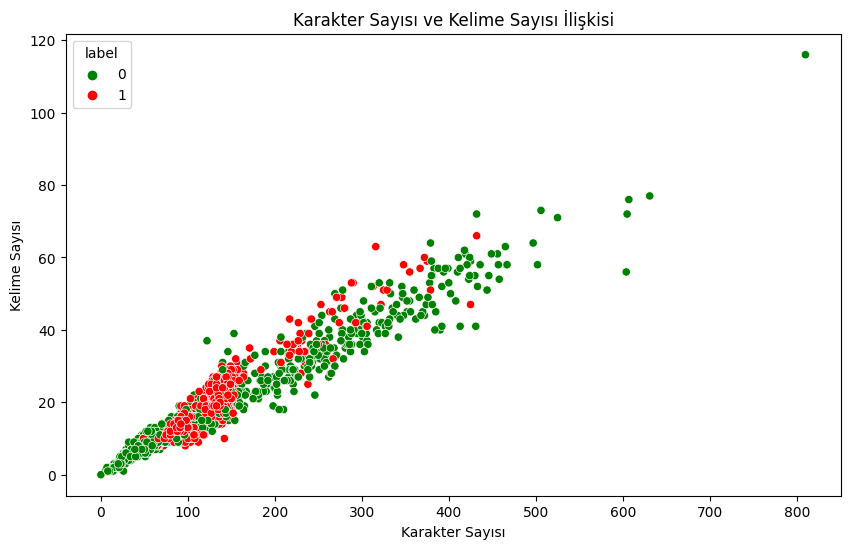

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='No_of_Characters', y='No_of_Words', hue='label', data=df, palette=['green','red'])
plt.title('Karakter Sayƒ±sƒ± ve Kelime Sayƒ±sƒ± ƒ∞li≈ükisi')
plt.xlabel('Karakter Sayƒ±sƒ±')
plt.ylabel('Kelime Sayƒ±sƒ±')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

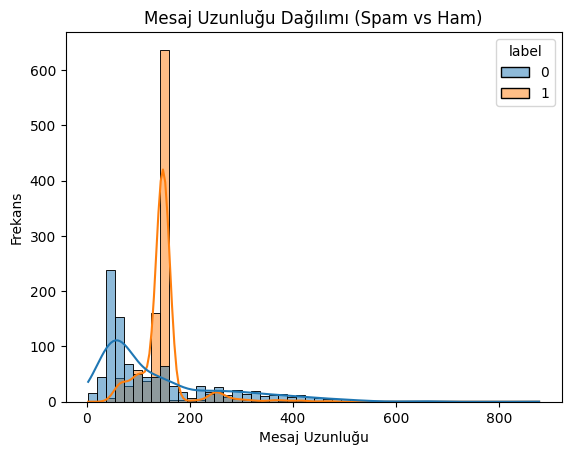

In [15]:
df['message_length'] = df['message'].apply(len)
sns.histplot(data=df, x='message_length', hue='label', bins=50, kde=True)
plt.title("Mesaj Uzunluƒüu Daƒüƒ±lƒ±mƒ± (Spam vs Ham)")
plt.xlabel("Mesaj Uzunluƒüu")
plt.ylabel("Frekans")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

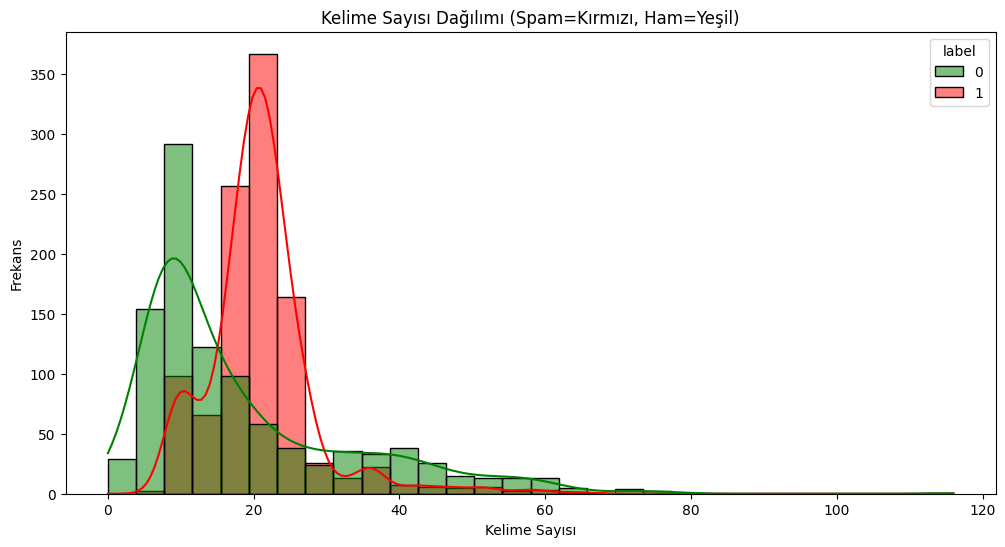

In [16]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='No_of_Words', hue='label', bins=30, kde=True, palette=['green','red'])
plt.title('Kelime Sayƒ±sƒ± Daƒüƒ±lƒ±mƒ± (Spam=Kƒ±rmƒ±zƒ±, Ham=Ye≈üil)')
plt.xlabel('Kelime Sayƒ±sƒ±')
plt.ylabel('Frekans')
plt.show()


# **MODEL OPTƒ∞Mƒ∞ZASYONU ve Eƒûƒ∞Tƒ∞Mƒ∞**

Temizlenmi≈ü metin verisi (message_cleaned) ve bunlara kar≈üƒ±lƒ±k gelen etiketleri (label) kullanarak veri setini eƒüitim ve test olarak ikiye b√∂ler.

X deƒüi≈ükeni, makine √∂ƒürenmesi modeline girdi olarak verilecek olan √∂nceden temizlenmi≈ü mesajlarƒ± i√ßerir.

y deƒüi≈ükeni ise bu mesajlarƒ±n spam (1) veya ham (0) olduƒüunu belirten sƒ±nƒ±f etiketlerini tutar.

train_test_split fonksiyonu, veriyi %80 eƒüitim ve %20 test olarak rastgele ayƒ±rƒ±r. random_state=42 parametresi, veri b√∂lme i≈üleminin tekrarlanabilirliƒüini saƒülar. B√∂ylece model eƒüitiminde kullanƒ±lacak veri ile doƒürulama i√ßin kullanƒ±lacak test verisi ayrƒ±lmƒ±≈ü olur.

In [17]:
# Veri ve etiketler
X = df['message_cleaned']  # √ñn i≈ülemeyi uyguladƒ±ƒüƒ±n s√ºtun
y = df['label']  # 0 veya 1 olarak spam etiketi

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Naive Bayes sƒ±nƒ±flandƒ±rƒ±cƒ±sƒ± i√ßin bir makine √∂ƒürenmesi pipeline‚Äôƒ± olu≈üturup hiperparametre optimizasyonu yapar:

**Pipeline:**
√ñncelikle TfidfVectorizer ile metin verileri 1 ve 2 gramlƒ± kelime √∂bekleri bazƒ±nda TF-IDF vekt√∂rlerine d√∂n√º≈üt√ºr√ºl√ºr. Vekt√∂r boyutu max_features=3000 ile sƒ±nƒ±rlandƒ±rƒ±lƒ±r. Ardƒ±ndan MultinomialNB sƒ±nƒ±flandƒ±rƒ±cƒ±sƒ± kullanƒ±lƒ±r.

**Parametre Arama (GridSearchCV):**
TF-IDF vekt√∂rleyicide max_df ve min_df (kelime filtreleme e≈üikleri) ile Naive Bayes modelinin alpha (d√ºzeltme parametresi) deƒüerleri i√ßin √ßapraz doƒürulama (5 katmanlƒ±) ile en iyi kombinasyon bulunur. Model f1 skoruna g√∂re optimize edilir.

**Model Eƒüitimi ve Tahmin:**
En iyi parametrelerle pipeline X_train ve y_train √ºzerinde eƒüitilir. Sonrasƒ±nda test seti X_test √ºzerinde tahminler yapƒ±lƒ±r (y_pred_nb).

Bu s√ºre√ß, Naive Bayes sƒ±nƒ±flandƒ±rƒ±cƒ±sƒ±nƒ±n metin sƒ±nƒ±flandƒ±rma g√∂revindeki performansƒ±nƒ± iyile≈ütirmek i√ßin otomatik parametre ayarƒ± saƒülar.

In [18]:
# Naive Bayes
pipe_nb = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=3000, ngram_range=(1, 2))),
    ('clf', MultinomialNB())
])

param_grid_nb = {
    'tfidf__max_df': [0.5, 0.75],
    'tfidf__min_df': [1, 2],
    'clf__alpha': [0.1, 0.5, 1.0]
}

grid_nb = GridSearchCV(pipe_nb, param_grid_nb, cv=5, scoring='f1', n_jobs=-1)
grid_nb.fit(X_train, y_train)
best_nb = grid_nb.best_estimator_

# Tahmin yap
y_pred_nb = best_nb.predict(X_test)


Metin sƒ±nƒ±flandƒ±rma i√ßin Lojistik Regresyon (Logistic Regression) modelinin bir pipeline ile kurulup hiperparametre optimizasyonu yapƒ±ldƒ±ƒüƒ± a≈üamalarƒ± g√∂sterir:

**Pipeline:**
√ñncelikle TfidfVectorizer kullanƒ±larak metinler 1 ve 2 gramlƒ±k kelime √∂beklerine g√∂re TF-IDF vekt√∂rlerine d√∂n√º≈üt√ºr√ºl√ºr. Maksimum √∂zellik sayƒ±sƒ± 3000 olarak sƒ±nƒ±rlandƒ±rƒ±lmƒ±≈ütƒ±r. Daha sonra bu vekt√∂rler, LogisticRegression sƒ±nƒ±flandƒ±rƒ±cƒ±sƒ±na beslenir. Modelin maksimum iterasyon sayƒ±sƒ± 1000 olarak ayarlanmƒ±≈ütƒ±r.

**Hiperparametre Arama (GridSearchCV):**
TF-IDF vekt√∂rle≈ütirici i√ßin max_df ve min_df parametreleri ile Lojistik Regresyonun d√ºzenleme g√ºc√ºn√º kontrol eden C parametresi farklƒ± deƒüerler alarak 5 katlƒ± √ßapraz doƒürulama ile en iyi parametreler bulunur. Optimize etme √∂l√ß√ºt√º olarak f1 skoru kullanƒ±lƒ±r.

**Model Eƒüitimi ve Tahmin:**
Eƒüitim verisi √ºzerinde en iyi parametrelerle model eƒüitilir ve ardƒ±ndan test setindeki veriler i√ßin tahminler (y_pred_lr) yapƒ±lƒ±r.

Bu yapƒ±, Lojistik Regresyon modelinin metin sƒ±nƒ±flandƒ±rma g√∂revindeki performansƒ±nƒ± artƒ±rmak i√ßin parametrelerin sistematik olarak ayarlanmasƒ±nƒ± saƒülar.

In [19]:

pipe_lr = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=3000, ngram_range=(1, 2))),
    ('clf', LogisticRegression(max_iter=1000))
])

param_grid_lr = {
    'tfidf__max_df': [0.5, 0.75],
    'tfidf__min_df': [1, 2],
    'clf__C': [0.1, 1, 10]
}

grid_lr = GridSearchCV(pipe_lr, param_grid_lr, cv=5, scoring='f1', n_jobs=-1)
grid_lr.fit(X_train, y_train)
best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test)


Metin sƒ±nƒ±flandƒ±rma i√ßin Rastgele Orman (Random Forest) modelinin kurulmasƒ±, hiperparametre optimizasyonu ve test verisi √ºzerinde tahmin yapƒ±lmasƒ±nƒ± kapsamaktadƒ±r:

**Rastgelelik Sabitleme:**
random.seed(42), np.random.seed(42) ve os.environ['PYTHONHASHSEED'] = '42' komutlarƒ±yla t√ºm rastgelelik kaynaklarƒ± sabitlenerek deneylerin tekrarlanabilirliƒüi saƒülanƒ±r.

**Pipeline:**
TfidfVectorizer ile metinler 1 ve 2 kelimelik n-gramlar olarak TF-IDF vekt√∂rlerine d√∂n√º≈üt√ºr√ºl√ºr. Maksimum √∂zellik sayƒ±sƒ± 3000 olarak sƒ±nƒ±rlandƒ±rƒ±lmƒ±≈ütƒ±r. Ardƒ±ndan bu vekt√∂rler, RandomForestClassifier modeline beslenir. Modelin random_state parametresi 42 olarak ayarlanmƒ±≈ütƒ±r.

**Hiperparametre Arama:**
max_df, min_df (TF-IDF vekt√∂rle≈ütirici i√ßin), n_estimators (aƒüa√ß sayƒ±sƒ±) ve max_depth (aƒüa√ß derinliƒüi) parametreleri farklƒ± deƒüerlerle denenir. Be≈ü katlƒ± stratifikasyonlu √ßapraz doƒürulama (StratifiedKFold) kullanƒ±larak en iyi parametre kombinasyonu se√ßilir. Deƒüerlendirme metriƒüi olarak F1 skoru kullanƒ±lmƒ±≈ütƒ±r.

**Model Eƒüitimi ve Tahmin**:
En iyi parametrelerle model eƒüitilir ve test verisi √ºzerinde sƒ±nƒ±flandƒ±rma tahminleri yapƒ±lƒ±r (y_pred_rf).

Bu yapƒ±, Random Forest modelinin parametrelerini optimize ederek metin sƒ±nƒ±flandƒ±rmadaki performansƒ±nƒ± artƒ±rmaya y√∂neliktir

In [20]:

# Sabit rastgelelik
random.seed(42)
np.random.seed(42)
os.environ['PYTHONHASHSEED'] = '42'

# Model ve pipeline
pipe_rf = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=3000, ngram_range=(1, 2))),
    ('clf', RandomForestClassifier(random_state=42))
])

param_grid_rf = {
    'tfidf__max_df': [0.5, 0.75],
    'tfidf__min_df': [1, 2],
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10, 20]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=cv, scoring='f1', n_jobs=-1)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

# Tahmin
y_pred_rf = best_rf.predict(X_test)


Metin sƒ±nƒ±flandƒ±rmasƒ± i√ßin Destek Vekt√∂r Makineleri (SVM) modelinin olu≈üturulmasƒ±, hiperparametre optimizasyonu ve test verisi √ºzerinde tahmin yapƒ±lmasƒ±nƒ± i√ßermektedir:

**Pipeline Kurulumu:**
Metin verisi, TfidfVectorizer ile TF-IDF √∂zelliklerine d√∂n√º≈üt√ºr√ºl√ºr. Vekt√∂rle≈ütirici, maksimum 3000 √∂zelliƒüe ve 1-2 kelimelik n-gram aralƒ±ƒüƒ±na g√∂re yapƒ±landƒ±rƒ±lmƒ±≈ütƒ±r. Ardƒ±ndan, LinearSVC sƒ±nƒ±flandƒ±rƒ±cƒ±sƒ± ile metinler sƒ±nƒ±flandƒ±rƒ±lƒ±r.

**Hiperparametre Ayarƒ±:**
GridSearchCV ile TF-IDF i√ßin max_df ve min_df parametreleri ile SVM modelinin C (d√ºzenleme parametresi) deƒüerleri √ße≈üitli kombinasyonlarla denenir. 5 katlƒ± √ßapraz doƒürulama (cv=5) uygulanƒ±r ve modelin ba≈üarƒ±sƒ± F1 skoru ile deƒüerlendirilir.

**Model Eƒüitimi ve Tahmin:**
En iyi parametrelerle se√ßilen model (best_svm) eƒüitim verisi √ºzerinde eƒüitilir ve test seti √ºzerinde sƒ±nƒ±flandƒ±rma tahminleri (y_pred_svm) ger√ßekle≈ütirilir.

Bu yapƒ±, SVM modelinin metin sƒ±nƒ±flandƒ±rmadaki performansƒ±nƒ± artƒ±rmak i√ßin uygun parametrelerin sistematik olarak bulunmasƒ±nƒ± saƒülar.

In [21]:

pipe_svm = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=3000, ngram_range=(1, 2))),
    ('clf', LinearSVC())
])

param_grid_svm = {
    'tfidf__max_df': [0.5, 0.75],
    'tfidf__min_df': [1, 2],
    'clf__C': [0.1, 1, 10]
}

grid_svm = GridSearchCV(pipe_svm, param_grid_svm, cv=5, scoring='f1', n_jobs=-1)
grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)


SMS mesajlarƒ±nƒ±n spam olup olmadƒ±ƒüƒ±nƒ± sƒ±nƒ±flandƒ±rmak i√ßin d√∂rt farklƒ± makine √∂ƒürenmesi modeli kar≈üƒ±la≈ütƒ±rƒ±lmƒ±≈ütƒ±r: Naive Bayes, Lojistik Regresyon, Rastgele Orman (Random Forest) ve Destek Vekt√∂r Makineleri (SVM). Her model i√ßin bir pipeline tanƒ±mlanmƒ±≈ü ve metin verisi √ºzerinde TF-IDF (Term Frequency-Inverse Document Frequency) d√∂n√º≈ü√ºm√º uygulanmƒ±≈ütƒ±r.

Modellerin performanslarƒ±nƒ± artƒ±rmak amacƒ±yla, her pipeline i√ßin farklƒ± hiperparametre kombinasyonlarƒ± GridSearchCV y√∂ntemiyle √ßapraz doƒürulama (3 katlƒ± CV) kullanƒ±larak optimize edilmi≈ütir. Optimize edilen hiperparametreler arasƒ±nda TF-IDF‚Äônin max_df ve ngram_range deƒüerleri ile model √∂zel parametreleri (√∂rneƒüin Naive Bayes i√ßin alpha, Lojistik Regresyon ve SVM i√ßin C, Random Forest i√ßin n_estimators) yer almaktadƒ±r.

Her modelin eƒüitim s√ºreci sonunda, test verisi √ºzerinde tahminler yapƒ±lmƒ±≈ü ve sƒ±nƒ±flandƒ±rma performansƒ± doƒüruluk (accuracy), kesinlik (precision), duyarlƒ±lƒ±k (recall) ve F1-skora g√∂re deƒüerlendirilmi≈ütir. F1-skor, √∂zellikle dengesiz sƒ±nƒ±f daƒüƒ±lƒ±mƒ± bulunan spam verilerinde hem hatalƒ± pozitif hem de hatalƒ± negatif sonu√ßlarƒ± dengeleyerek model performansƒ±nƒ± √∂zetleyen √∂nemli bir metriktir.

In [22]:
random.seed(42)
np.random.seed(42)
os.environ['PYTHONHASHSEED'] = '42'

# Modelleri ve pipeline‚Äôlarƒ± s√∂zl√ºk olarak tanƒ±mla
pipelines = {
    'Naive Bayes': Pipeline([
        ('tfidf', TfidfVectorizer(max_features=3000, ngram_range=(1, 2))),
        ('clf', MultinomialNB())
    ]),
    'Logistic Regression': Pipeline([
        ('tfidf', TfidfVectorizer(max_features=3000, ngram_range=(1, 2))),
        ('clf', LogisticRegression(max_iter=1000))
    ]),
    'Random Forest': Pipeline([
        ('tfidf', TfidfVectorizer(max_features=3000, ngram_range=(1, 2))),
        ('clf', RandomForestClassifier(random_state=42))
    ]),
    'SVM': Pipeline([
        ('tfidf', TfidfVectorizer(max_features=3000, ngram_range=(1, 2))),
        ('clf', LinearSVC())
    ])
}

# Parametre gridleri
params = {
    'Naive Bayes': {
        'tfidf__max_df': [0.5, 0.75],
        'tfidf__min_df': [1, 2],
        'clf__alpha': [0.1, 0.5, 1.0]
    },
    'Logistic Regression': {
        'tfidf__max_df': [0.5, 0.75],
        'tfidf__min_df': [1, 2],
        'clf__C': [0.1, 1, 10]
    },
    'Random Forest': {
        'tfidf__max_df': [0.5, 0.75],
        'tfidf__min_df': [1, 2],
        'clf__n_estimators': [100, 200],
        'clf__max_depth': [None, 10, 20]
    },
    'SVM': {
        'tfidf__max_df': [0.5, 0.75],
        'tfidf__min_df': [1, 2],
        'clf__C': [0.1, 1, 10]
    }
}

# Sonu√ßlarƒ± saklamak i√ßin
results = []

# Model eƒüitim ve deƒüerlendirme d√∂ng√ºs√º
for model_name, pipeline in pipelines.items():
    print(f"Model: {model_name}")
    
    if model_name == 'Random Forest':
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    else:
        cv = 5  # diƒüerleri i√ßin klasik 5-fold

    grid = GridSearchCV(pipeline, params[model_name], cv=cv, n_jobs=-1, scoring='f1')
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    results.append({
        'Model': model_name,
        'Best Params': grid.best_params_,
        'Accuracy': accuracy,
        'Precision': report['1']['precision'],
        'Recall': report['1']['recall'],
        'F1-Score': report['1']['f1-score'],
    })
    
    print(f"Best params: {grid.best_params_}")
    print(f"F1-Score: {report['1']['f1-score']:.4f}")
    print('-' * 40)

# Sonu√ßlarƒ± tablo halinde g√∂ster
results_df = pd.DataFrame(results)
print(results_df)


Model: Naive Bayes
Best params: {'clf__alpha': 0.5, 'tfidf__max_df': 0.5, 'tfidf__min_df': 2}
F1-Score: 0.9476
----------------------------------------
Model: Logistic Regression
Best params: {'clf__C': 10, 'tfidf__max_df': 0.5, 'tfidf__min_df': 2}
F1-Score: 0.9843
----------------------------------------
Model: Random Forest
Best params: {'clf__max_depth': None, 'clf__n_estimators': 200, 'tfidf__max_df': 0.5, 'tfidf__min_df': 1}
F1-Score: 0.9822
----------------------------------------
Model: SVM
Best params: {'clf__C': 10, 'tfidf__max_df': 0.5, 'tfidf__min_df': 2}
F1-Score: 0.9865
----------------------------------------
                 Model                                        Best Params  \
0          Naive Bayes  {'clf__alpha': 0.5, 'tfidf__max_df': 0.5, 'tfi...   
1  Logistic Regression  {'clf__C': 10, 'tfidf__max_df': 0.5, 'tfidf__m...   
2        Random Forest  {'clf__max_depth': None, 'clf__n_estimators': ...   
3                  SVM  {'clf__C': 10, 'tfidf__max_df': 0.5, 

# **MODEL G√ñRSELLE≈ûTƒ∞RMELERƒ∞ ve GRAFƒ∞KLER**

Model kar≈üƒ±la≈ütƒ±rma sonu√ßlarƒ± bir pandas DataFrame'e d√∂n√º≈üt√ºr√ºlerek, her modelin test veri setindeki doƒüruluk (accuracy) deƒüerleri g√∂rselle≈ütirilmi≈ütir. Matplotlib ve seaborn k√ºt√ºphaneleri kullanƒ±larak olu≈üturulan barplot grafik, modellerin performanslarƒ±nƒ± yan yana kƒ±yaslamayƒ± kolayla≈ütƒ±rmaktadƒ±r.

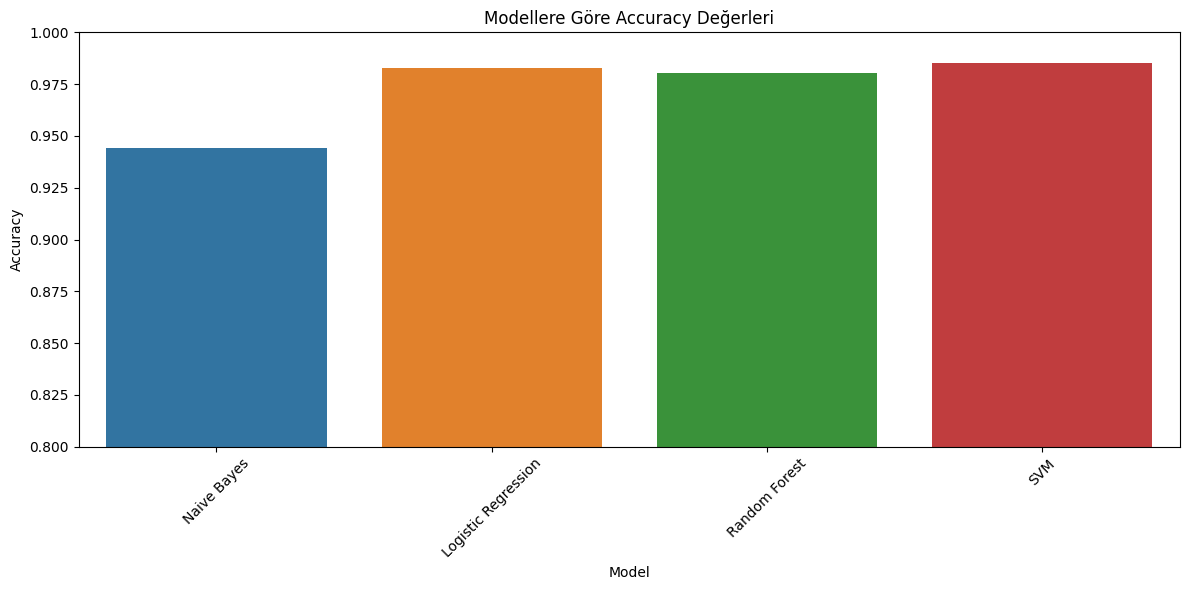

In [23]:
# Eƒüer hala listeyse
results_df = pd.DataFrame(results)

plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='Model', y='Accuracy')
plt.title("Modellere G√∂re Accuracy Deƒüerleri")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.ylim(0.8, 1.0)  # Daha net g√∂rmek i√ßin
plt.tight_layout()
plt.show()


Bu grafik, farklƒ± makine √∂ƒürenmesi modellerinin test verisi √ºzerindeki F1 skorlarƒ±nƒ± kar≈üƒ±la≈ütƒ±rmak amacƒ±yla olu≈üturulmu≈ütur. F1 skoru, modelin doƒüruluk ve geri √ßaƒüƒ±rma (recall) performansƒ±nƒ± dengeleyen √∂nemli bir metriktir ve √∂zellikle dengesiz sƒ±nƒ±flar i√ßin tercih edilir. Grafikte, modellerin F1 skorlarƒ± 0.8 ile 1.0 aralƒ±ƒüƒ±nda g√∂sterilerek, en ba≈üarƒ±lƒ± modellerin performans farklarƒ± net bir ≈üekilde ortaya konmu≈ütur.

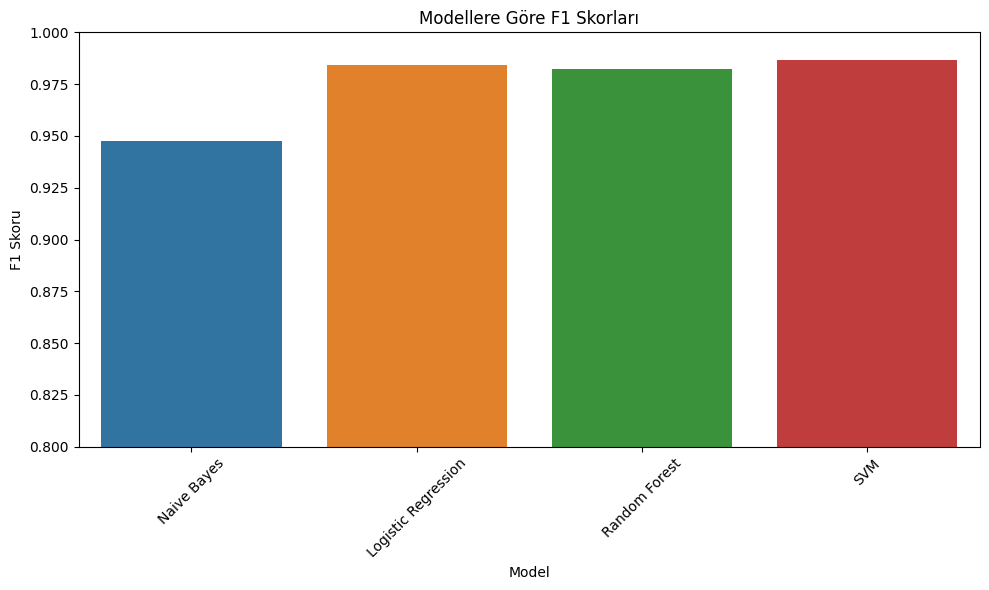

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='F1-Score')
plt.title("Modellere G√∂re F1 Skorlarƒ±")
plt.ylabel("F1 Skoru")
plt.xticks(rotation=45)
plt.ylim(0.8, 1.0)  # Daha net g√∂rmek i√ßin
plt.tight_layout()
plt.show()


Bu grafikler, farklƒ± modellerin Precision (kesinlik) ve Recall (duyarlƒ±lƒ±k) performanslarƒ±nƒ± kar≈üƒ±la≈ütƒ±rmak i√ßin olu≈üturuldu.

**Precision**: Modelin pozitif tahminlerinin ne kadarƒ±nƒ±n ger√ßekten doƒüru olduƒüunu g√∂sterir. (Spam olarak tahmin edilen mesajlarƒ±n ne kadarƒ±nƒ±n ger√ßekten spam olduƒüu)

**Recall**: Modelin ger√ßek pozitifleri ne kadar yakaladƒ±ƒüƒ±nƒ± g√∂sterir. (Ger√ßek spam mesajlarƒ±n ne kadarƒ±nƒ±n doƒüru tespit edildiƒüi)

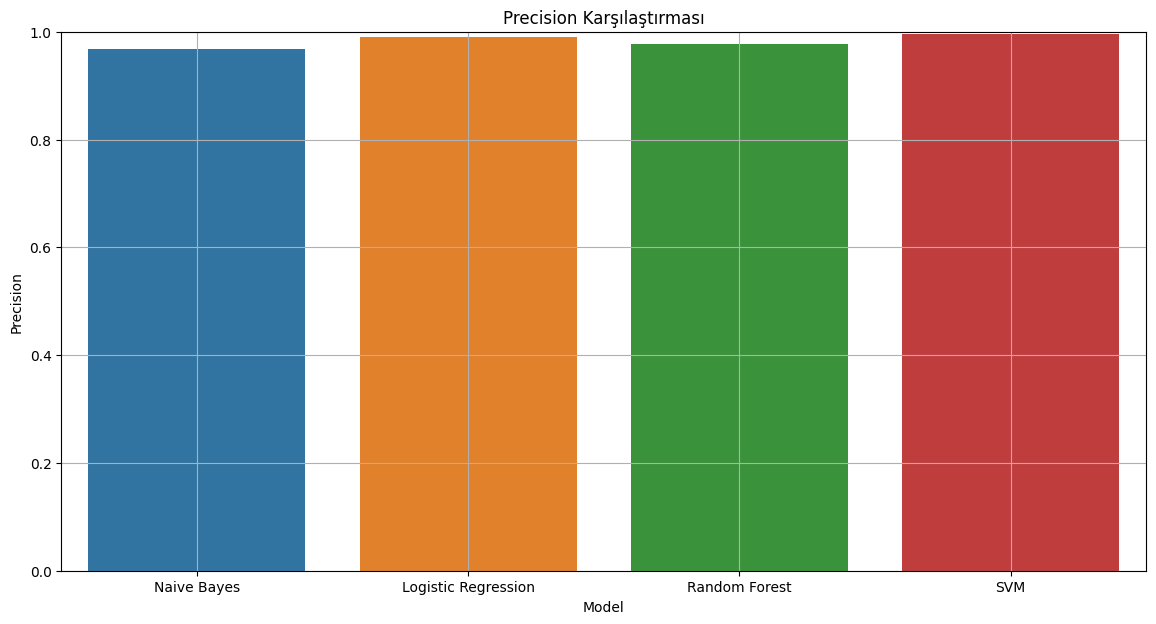

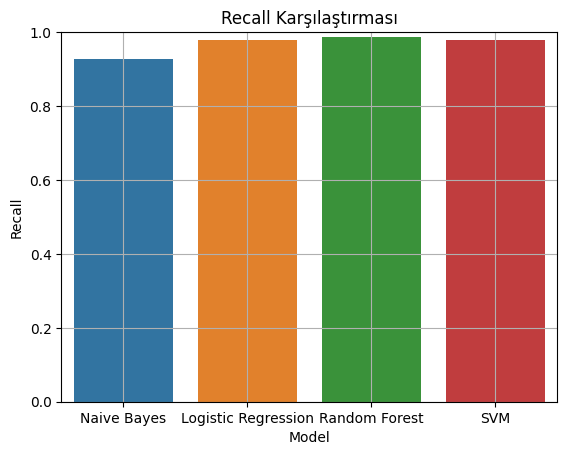

In [25]:

# Sonu√ßlarƒ± DataFrame'e √ßevirmi≈ütin:
metrics = ['Precision', 'Recall' ]
plt.figure(figsize=(14,7))

for metric in metrics:
    sns.barplot(x='Model', y=metric, data=results_df)
    plt.title(f'{metric} Kar≈üƒ±la≈ütƒ±rmasƒ±')
    plt.ylabel(metric)
    plt.xlabel('Model')
    plt.ylim(0, 1)
    plt.grid(True)
    plt.show()


Bu ƒ±sƒ± haritasƒ±, modellerin √ße≈üitli performans metrikleri arasƒ±ndaki ili≈ükiyi incelemek i√ßin olu≈üturulmu≈ütur.

‚Ä¢ Accuracy, Precision, Recall ve F1-Score metrikleri arasƒ±ndaki korelasyonlar hesaplanmƒ±≈ü ve g√∂rselle≈ütirilmi≈ütir.

‚Ä¢ Isƒ± haritasƒ±nda koyu kƒ±rmƒ±zƒ± renkten koyu mavi renge doƒüru deƒüi≈üen tonlar, metrikler arasƒ±ndaki pozitif veya negatif korelasyonlarƒ±n derecesini yansƒ±tƒ±r.

‚Ä¢ H√ºcre i√ßindeki sayƒ±lar, ilgili iki metrik arasƒ±ndaki Pearson korelasyon katsayƒ±sƒ±nƒ± g√∂sterir. 1.0 m√ºkemmel pozitif korelasyonu, -1.0 ise m√ºkemmel  negatif korelasyonu ifade eder.

‚Ä¢ Burada ama√ß, metriklerin birbirleriyle ne kadar √∂rt√º≈üt√ºƒü√ºn√º anlamak ve hangi metriklerin performans deƒüerlendirmesinde birbirini desteklediƒüini g√∂rmektir.

Bu analiz, model se√ßimi ve deƒüerlendirmede hangi metriklerin birlikte kullanƒ±lmasƒ±nƒ±n anlamlƒ± olduƒüunu ortaya koyar.

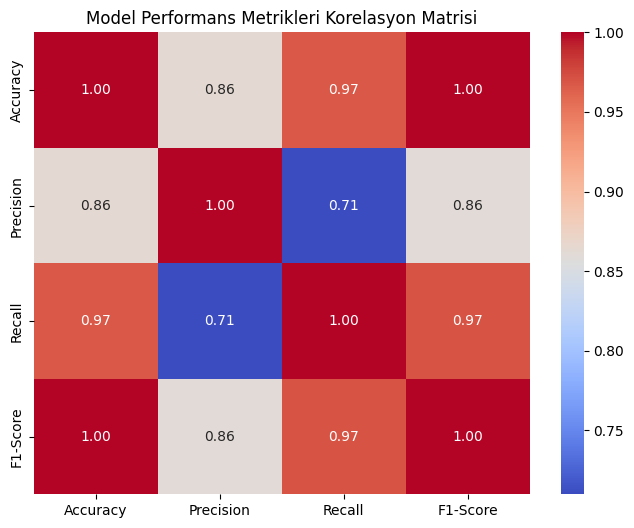

In [26]:
plt.figure(figsize=(8, 6))
corr = results_df[['Accuracy', 'Precision', 'Recall', 'F1-Score']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Model Performans Metrikleri Korelasyon Matrisi")
plt.show()


Her model i√ßin olu≈üturulan karƒ±≈üƒ±klƒ±k matrisleri, modelin doƒüru ve yanlƒ±≈ü sƒ±nƒ±flandƒ±rma performansƒ±nƒ± g√∂rsel olarak incelememize olanak saƒülar:

‚Ä¢ Ham (Non-Spam) ve Spam sƒ±nƒ±flarƒ± i√ßin ger√ßek ve tahmin edilen etiketler kar≈üƒ±la≈ütƒ±rƒ±lƒ±r.

‚Ä¢ Matrisin diagonalindeki deƒüerler (√ºst sol ve alt saƒü h√ºcreler) doƒüru sƒ±nƒ±flandƒ±rmalarƒ± g√∂sterirken,

‚Ä¢ Diagonal dƒ±≈üƒ±ndaki h√ºcreler yanlƒ±≈ü sƒ±nƒ±flandƒ±rmalarƒ± ifade eder.

‚Ä¢ Bu sayede modelin hangi sƒ±nƒ±fta daha iyi veya k√∂t√º performans g√∂sterdiƒüi anla≈üƒ±lƒ±r.

Her model i√ßin farklƒ± renk paletleri (Blues, Greens, Purples, Oranges) kullanƒ±larak karƒ±≈üƒ±klƒ±k matrisleri g√∂rsel olarak ayrƒ±≈ütƒ±rƒ±lmƒ±≈ütƒ±r, b√∂ylece modeller kolayca kar≈üƒ±la≈ütƒ±rƒ±labilir.

√ñzetle, bu g√∂rseller:

‚Ä¢ Modellerin spam ve ham mesajlarƒ± ne kadar doƒüru ayƒ±rt ettiƒüini,

‚Ä¢ Yanlƒ±≈ü pozitif ve yanlƒ±≈ü negatif oranlarƒ±nƒ± a√ßƒ±k ≈üekilde g√∂sterir.

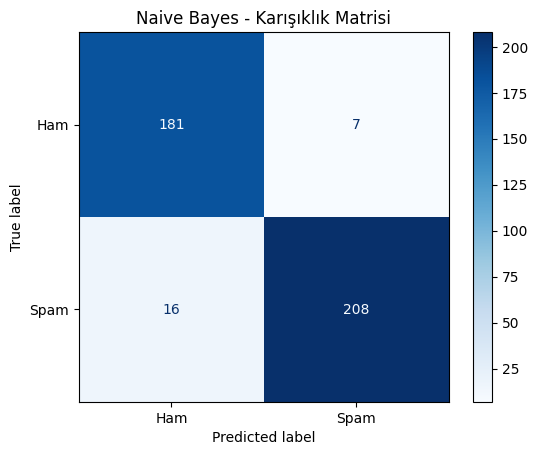

In [27]:

cm_nb = confusion_matrix(y_test, y_pred_nb)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=['Ham', 'Spam'])
disp_nb.plot(cmap='Blues')
plt.title("Naive Bayes - Karƒ±≈üƒ±klƒ±k Matrisi")
plt.show()


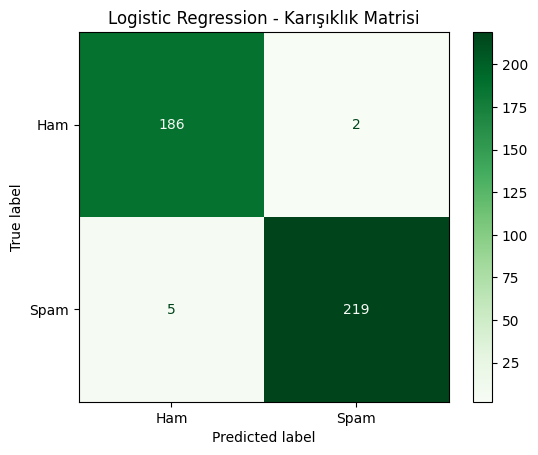

In [28]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['Ham', 'Spam'])
disp_lr.plot(cmap='Greens')
plt.title("Logistic Regression - Karƒ±≈üƒ±klƒ±k Matrisi")
plt.show()


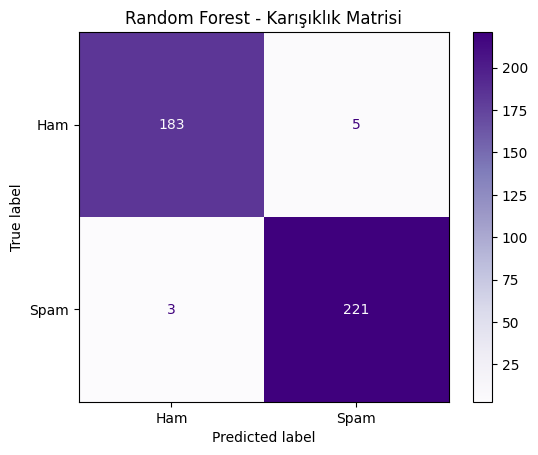

In [29]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Ham', 'Spam'])
disp_rf.plot(cmap='Purples')
plt.title("Random Forest - Karƒ±≈üƒ±klƒ±k Matrisi")
plt.show()


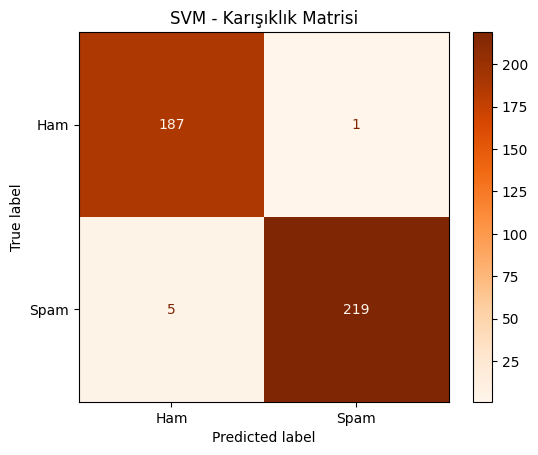

In [30]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=['Ham', 'Spam'])
disp_svm.plot(cmap='Oranges')
plt.title("SVM - Karƒ±≈üƒ±klƒ±k Matrisi")
plt.show()


# **MODEL SONU√áLARI ve MODELƒ∞ TEST ETME**

Modelin hangi kelimeler √ºzerinden karar verdiƒüini daha iyi anlamak i√ßin, mesajlar sƒ±nƒ±flarƒ±na (spam ve ham) ayrƒ±ldƒ±ktan sonra her sƒ±nƒ±fa ait kelimeler incelendi. Temizlenmi≈ü (noktalama i≈üaretlerinden ve durak kelimelerinden arƒ±ndƒ±rƒ±lmƒ±≈ü) metinlerdeki kelimeler bo≈üluklara g√∂re b√∂l√ºnerek liste haline getirildi.

**Spam Mesajlar:** T√ºm spam mesajlar birle≈ütirildi ve i√ßerisindeki kelimeler sayƒ±larak en sƒ±k ge√ßen 20 kelime belirlendi.

**Ham Mesajlar:** Benzer ≈üekilde, normal (ham) mesajlardaki en sƒ±k ge√ßen 20 kelime de ayrƒ± olarak √ßƒ±karƒ±ldƒ±.

Elde edilen veriler iki ayrƒ± DataFrame'e aktarƒ±ldƒ± ve sonu√ßlar kar≈üƒ±la≈ütƒ±rmalƒ± olarak yan yana g√∂sterildi. Bu i≈ülem, spam mesajlarƒ±n genellikle promosyon, √∂d√ºl, para gibi kelimeler i√ßerdiƒüini; ham mesajlarƒ±n ise daha g√ºndelik ve baƒülamsal kelimelerden olu≈ütuƒüunu g√∂zlemlemeye olanak tanƒ±r.

Bu analiz, modelin hangi kelimelere daha fazla "√∂nem" verdiƒüi konusunda i√ßg√∂r√º saƒülayarak √∂zellik m√ºhendisliƒüi a≈üamasƒ±nda fikir verir.

In [31]:
# Mesajlarƒ± bo≈üluklara g√∂re ayƒ±rarak kelime listesi olu≈ütur
spam_words = " ".join(df[df['label'] == 1]['message_cleaned']).split()
ham_words = " ".join(df[df['label'] == 0]['message_cleaned']).split()

# En sƒ±k ge√ßen 20 kelimeyi bul
spam_common = Counter(spam_words).most_common(20)
ham_common = Counter(ham_words).most_common(20)

# DataFrame olarak g√∂ster
spam_df = pd.DataFrame(spam_common, columns=['Kelime', 'Spam Frekansƒ±'])
ham_df = pd.DataFrame(ham_common, columns=['Kelime', 'Ham Frekansƒ±'])

# Yan yana g√∂stermek i√ßin:
combined_df = pd.concat([spam_df, ham_df], axis=1)
print(combined_df)


    Kelime  Spam Frekansƒ±    Kelime  Ham Frekansƒ±
0      yaz            676    NUMARA           210
1    iptal            595        tl           107
2     b013            571      b002           105
3    4607e            450      b003            87
4      sms            419      b016            76
5   g√∂nder            377     bug√ºn            67
6     55gm            239    teslim            66
7   gonder            214      yeni            58
8       tl            193      saat            56
9   NUMARA            131     iptal            54
10     -99             98      kodu            53
11  phebia             91      b001            52
12     son             91       sms            49
13   hemen             87   mersis:            46
14   4607'             81  internet            43
15    cuma             81     almak            43
16    phba             79     bilgi            40
17   kayit             69   degerli            40
18     oto             64     i√ßin:          

Spam tespiti i√ßin metin verisinin i√ßeriƒüini analiz etmek olduk√ßa √∂nemlidir. Bu √ßalƒ±≈ümada, temizlenmi≈ü metin verileri √ºzerinden en sƒ±k ge√ßen kelimeler √ßƒ±karƒ±lmƒ±≈ü ve bu kelimelerin hem spam hem de ham mesajlarda hangi sƒ±klƒ±kta ge√ßtiƒüi kƒ±yaslanmƒ±≈ütƒ±r.

√ñncelikle, her iki sƒ±nƒ±f i√ßin en sƒ±k ge√ßen 10 kelime tespit edilmi≈ütir. Ardƒ±ndan bu kelimeler birle≈ütirilerek ortak bir kelime listesi olu≈üturulmu≈ü, b√∂ylece spam ve ham mesajlar arasƒ±ndaki i√ßerik farkƒ± daha net g√∂r√ºlebilmi≈ütir.

Elde edilen sonu√ßlar yatay √ßubuk grafik ile g√∂rselle≈ütirilmi≈ütir:

 ‚Ä¢ Kƒ±rmƒ±zƒ± √ßubuklar, spam mesajlarda ge√ßen kelimelerin frekansƒ±nƒ± g√∂sterir.

 ‚Ä¢ Ye≈üil √ßubuklar, ham mesajlardaki kar≈üƒ±lƒ±k gelen kelimelerin frekanslarƒ±nƒ± belirtir.

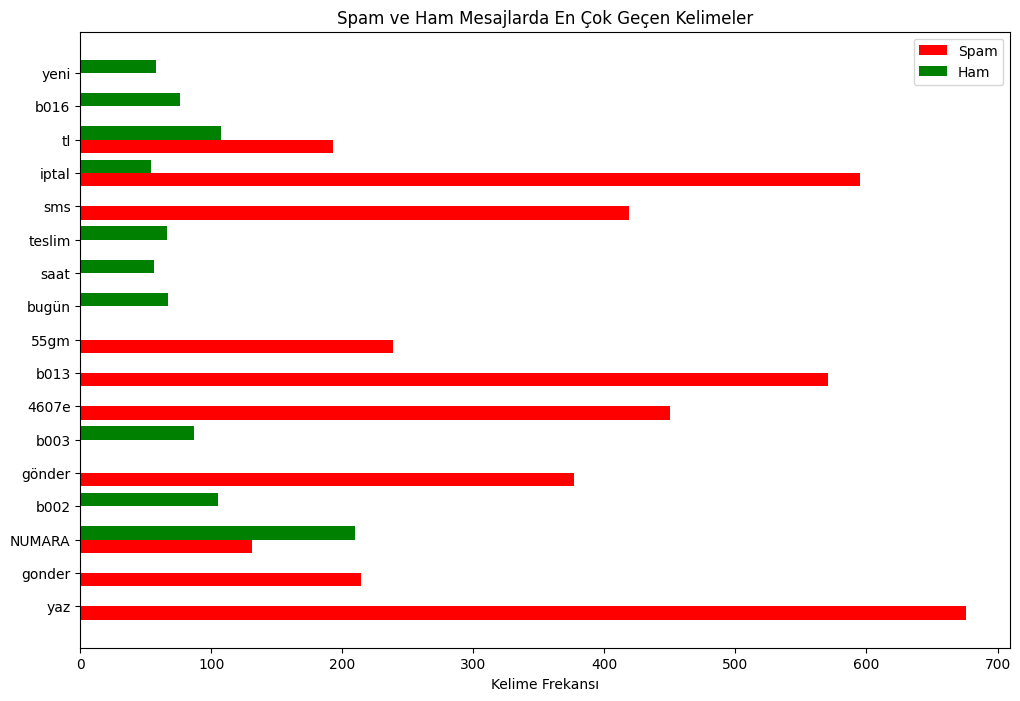

In [32]:

# Kelimeleri hazƒ±rla
spam_words = " ".join(df[df['label'] == 1]['message_cleaned']).split()
ham_words = " ".join(df[df['label'] == 0]['message_cleaned']).split()

spam_common = Counter(spam_words).most_common(10)
ham_common = Counter(ham_words).most_common(10)

# DataFrame'e √ßevir
import pandas as pd
spam_df = pd.DataFrame(spam_common, columns=['word', 'count'])
ham_df = pd.DataFrame(ham_common, columns=['word', 'count'])

# En √ßok ge√ßen kelimelerden ortak olanlarƒ± al
common_words = list(set(spam_df['word']).union(set(ham_df['word'])))

# Kelimelere g√∂re countlarƒ± e≈üitleyelim
spam_counts = [spam_df[spam_df['word'] == w]['count'].values[0] if w in spam_df['word'].values else 0 for w in common_words]
ham_counts = [ham_df[ham_df['word'] == w]['count'].values[0] if w in ham_df['word'].values else 0 for w in common_words]

# Grafik olu≈ütur
plt.figure(figsize=(12,8))
bar_width = 0.4
indices = range(len(common_words))

plt.barh([i + bar_width for i in indices], spam_counts, height=bar_width, color='red', label='Spam')
plt.barh(indices, ham_counts, height=bar_width, color='green', label='Ham')

plt.yticks([i + bar_width/2 for i in indices], common_words)
plt.xlabel('Kelime Frekansƒ±')
plt.title('Spam ve Ham Mesajlarda En √áok Ge√ßen Kelimeler')
plt.legend()
plt.gca().invert_yaxis()
plt.show()


Modelin doƒüruluƒüunu sadece test verisiyle deƒüil, aynƒ± zamanda ger√ßek hayat senaryolarƒ±na yakƒ±n √∂rneklerle test etmek amacƒ±yla predict_messages() adƒ±nda √∂zel bir yardƒ±mcƒ± fonksiyon olu≈üturulmu≈ütur. Bu fonksiyonun temel i≈ülevi, modelin spam ve ham mesajlarƒ± ne kadar doƒüru sƒ±nƒ±flandƒ±rabildiƒüini g√∂zlemlemeyi kolayla≈ütƒ±rmaktƒ±r.

Fonksiyonun parametreleri ≈üunlardƒ±r:

**messages**:Tahmin edilmek istenen mesajlarƒ± i√ßeren bir liste

**trained_model**: TF-IDF vekt√∂rle≈ütirme ve sƒ±nƒ±flandƒ±rƒ±cƒ± i√ßeren, Pipeline yapƒ±sƒ±yla eƒüitilmi≈ü model

√ñrnek olarak verilen mesajlar √ºzerinde GridSearchCV ile optimize edilmi≈ü SVM modeli (grid_svm.best_estimator_) kullanƒ±larak tahmin yapƒ±lmƒ±≈ütƒ±r.

Bu fonksiyon sayesinde modelin ger√ßek d√ºnya mesajlarƒ±nda ne kadar etkili √ßalƒ±≈ütƒ±ƒüƒ± pratik olarak g√∂zlemlenebilir.

In [33]:
def predict_messages(messages, trained_model):
    """
    Yeni gelen mesajlarƒ±n spam mi ham mƒ± olduƒüunu tahmin eder.

    Parametreler:
    - messages (list): Tahmin edilmek istenen mesajlar (string listesi)
    - trained_model (Pipeline): TF-IDF ve sƒ±nƒ±flandƒ±rƒ±cƒ± i√ßeren eƒüitilmi≈ü model

    √áƒ±ktƒ±:
    - Ekrana her mesaj i√ßin tahmin sonucu (Spam veya Ham)
    """
    predictions = trained_model.predict(messages)

    for msg, pred in zip(messages, predictions):
        label = "Spam" if pred == 1 else "Ham"
        print(f"Mesaj: {msg}\n‚Üí Tahmin: {label}\n")


# √ñrnek kullanƒ±m
sample_messages = [
    "Bug√ºn saat 3‚Äôte k√ºt√ºphanede bulu≈üuyoruz, unutma!",
    "Kargonuz teslim edilemedi. Adresinizi g√ºncelleyin: https://ptt-takip.xyz",
    "Starbucks‚Äôta bulu≈üalƒ±m mƒ±, yeni kahveler gelmi≈ü.",
    "Mobil √∂deme ile TL kazanmak i√ßin HEMEN ARA",
    "%50 indirim! Bug√ºn son g√ºn. Hemen √ºye olun ve kazanƒ±n!",
    "Sayƒ±n abonemiz, faturanƒ±zƒ± 24 saat i√ßinde √∂demezseniz hattƒ±nƒ±z kapatƒ±lacaktƒ±r. Bilginize",
    "Baba ben geldim, birazdan yemek yer miyiz?",
    "Liselere Ge√ßi≈ü Sistemi (LGS) sƒ±navƒ±na girecek olan t√ºm √∂ƒürencilerimize ba≈üarƒ±lar diliyorum.",
    "Tebrikler! 500‚Ç∫ kazandƒ±nƒ±z üéÅ Hemen https://√∂d√ºlal.com adresinden √ßekin!",
    "PTT teslimatƒ±nƒ±z beklemede ‚ùó Adresinizi g√ºncelleyin: https://ptt-kargo.org",
    "Mobil √∂deme ile TL kazanmak i√ßin HEMEN ARA: 0850 000 00 00",

]
# Eƒüitilmi≈ü en iyi modelin burada y√ºkl√º olmalƒ± (√∂rneƒüin):
# best_model = grid.best_estimator_  (√∂rneƒüin Logistic Regression, Naive Bayes vs.)
# A≈üaƒüƒ±daki satƒ±rƒ± kendi modeline g√∂re deƒüi≈ütir:
best_model = grid_svm.best_estimator_  # grid: GridSearchCV ile eƒüittiƒüin nesne

predict_messages(sample_messages, best_model)


Mesaj: Bug√ºn saat 3‚Äôte k√ºt√ºphanede bulu≈üuyoruz, unutma!
‚Üí Tahmin: Ham

Mesaj: Kargonuz teslim edilemedi. Adresinizi g√ºncelleyin: https://ptt-takip.xyz
‚Üí Tahmin: Spam

Mesaj: Starbucks‚Äôta bulu≈üalƒ±m mƒ±, yeni kahveler gelmi≈ü.
‚Üí Tahmin: Ham

Mesaj: Mobil √∂deme ile TL kazanmak i√ßin HEMEN ARA
‚Üí Tahmin: Spam

Mesaj: %50 indirim! Bug√ºn son g√ºn. Hemen √ºye olun ve kazanƒ±n!
‚Üí Tahmin: Spam

Mesaj: Sayƒ±n abonemiz, faturanƒ±zƒ± 24 saat i√ßinde √∂demezseniz hattƒ±nƒ±z kapatƒ±lacaktƒ±r. Bilginize
‚Üí Tahmin: Ham

Mesaj: Baba ben geldim, birazdan yemek yer miyiz?
‚Üí Tahmin: Ham

Mesaj: Liselere Ge√ßi≈ü Sistemi (LGS) sƒ±navƒ±na girecek olan t√ºm √∂ƒürencilerimize ba≈üarƒ±lar diliyorum.
‚Üí Tahmin: Ham

Mesaj: Tebrikler! 500‚Ç∫ kazandƒ±nƒ±z üéÅ Hemen https://√∂d√ºlal.com adresinden √ßekin!
‚Üí Tahmin: Spam

Mesaj: PTT teslimatƒ±nƒ±z beklemede ‚ùó Adresinizi g√ºncelleyin: https://ptt-kargo.org
‚Üí Tahmin: Spam

Mesaj: Mobil √∂deme ile TL kazanmak i√ßin HEMEN ARA: 0850 000 0